In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [7]:
cal = datasets.fetch_california_housing()

In [8]:
cal.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
cal.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [10]:
cal.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
df = pd.DataFrame(cal.data, columns=cal.feature_names)

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


{'whiskers': [<matplotlib.lines.Line2D at 0x1ea8fd2bd30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea8fd496d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea8fd2bbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea8fd49d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea8fd49e48>],
 'means': []}

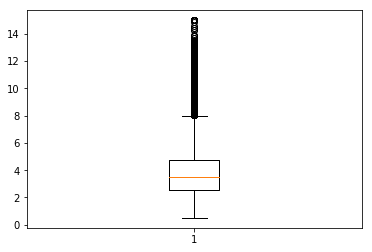

In [13]:
plt.boxplot(df['MedInc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea8fc206a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea8fc20d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea8fc202b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea8fc2a400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea8fc2a748>],
 'means': []}

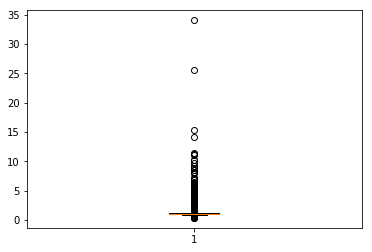

In [14]:
plt.boxplot(df['AveBedrms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea8fbc4e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea8fbcc550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea8fbc4a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea8fbccbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea8fbccf28>],
 'means': []}

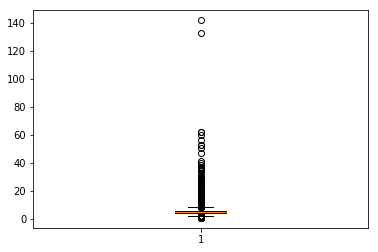

In [15]:
plt.boxplot(df['AveRooms'])

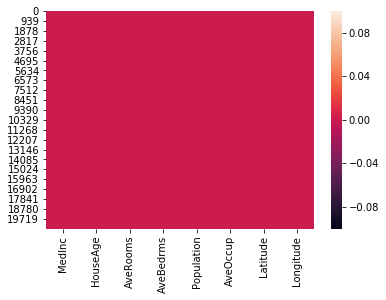

In [16]:
sns.heatmap(df.isnull())

In [17]:
df['target']= cal.target

In [18]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
df.shape

(20640, 9)

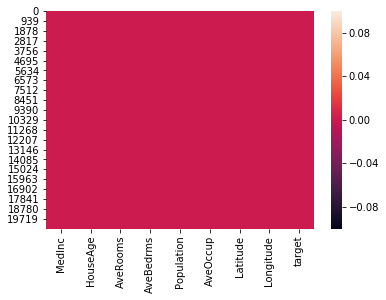

In [20]:
sns.heatmap(df.isnull())

In [21]:
plt.figure(figsize=(10,10))
plt.show()

<Figure size 720x720 with 0 Axes>

In [22]:
dfcorr = df.corr()

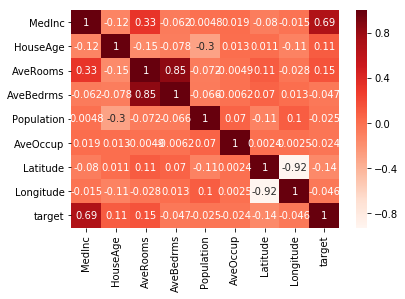

In [23]:
sns.heatmap(dfcorr, cmap="Reds", annot = True)

In [24]:
x = df.iloc[:,0:-1].values

In [25]:
y=df.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.33, random_state=47)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lr.score(x_train,y_train)

0.6047580590926251

In [31]:
pred = lr.predict(x_test)

In [32]:
pred

array([2.40837273, 1.44464453, 3.97951276, ..., 2.22574889, 1.86967911,
       3.07522263])

In [33]:
print("predicted result price:", pred)
print("actual price:", y)

predicted result price: [2.40837273 1.44464453 3.97951276 ... 2.22574889 1.86967911 3.07522263]
actual price: [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [34]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13828, 8) (13828,)
(6812, 8) (6812,)


In [35]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from timeit import default_timer as timer
strtime = timer()
lr.fit(x_train,y_train)
prednew = lr.predict(x_test)
endtime = timer()
# calculate function runtime..

total_time= (endtime-strtime)
total_time

0.0073979000000008455

In [36]:
from timeit import default_timer as timer
start_ho = timer()
end_ho = timer()
time_ho = (end_ho - start_ho)

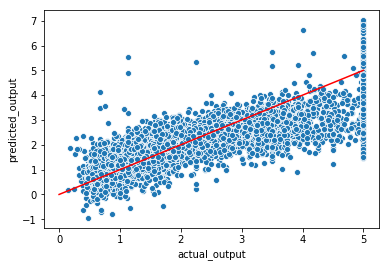

In [43]:
plt = sns.scatterplot(y_test, prednew)
plt.set(xlabel= 'actual_output', ylabel= 'predicted_output')

# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [45]:

from sklearn.model_selection import cross_val_predict

In [50]:
strtimek = timer()
lrk = LinearRegression()
predk = cross_val_predict(lrk, x, y, cv=5)
predk
endtimek = timer()

In [52]:
predk
ktime= (endtimek-strtimek)

In [53]:
print(predk)

[4.25514165 4.05844724 3.81103328 ... 0.14384532 0.29510241 0.49760107]


In [54]:
print(ktime)

0.08086989999992511


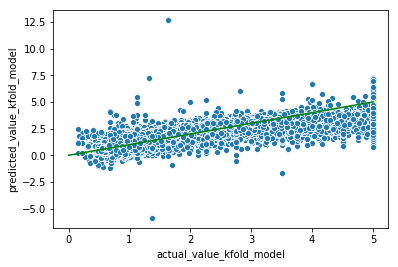

In [60]:
pltk = sns.scatterplot(y,predk)
pltk.set(xlabel= 'actual_value_kfold_model', ylabel='predicted_value_kfold_model')
x_plot = np.linspace(0,5,100)
y_plot = x_plot
pltk.plot(x_plot, y_plot, color = 'g')

In [62]:
kstrtime = timer()
from sklearn.model_selection import cross_val_score

In [64]:
cvsscore = cross_val_score(lrk, x, y, cv=10, scoring ='neg_mean_squared_error')
print(cvsscore.mean())
kendtime = timer()

total_ktime = (kendtime-kstrtime)

-0.550952429695665


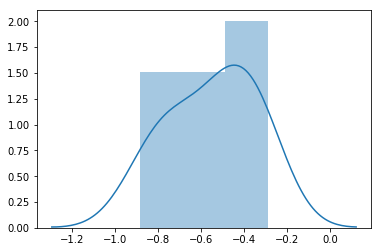

In [69]:
sns.distplot(cvsscore, bins=3)

In [71]:
start_loo = timer()
pred_loo = cross_val_predict(lrk, x, y, cv = (len(x)))
end_loo = timer()
total_loo = (end_loo-start_loo)


In [72]:
print(total_loo)
print(pred_loo)

310.41413909999983
[4.13145514 3.9768038  3.67666237 ... 0.17089385 0.31886646 0.51563286]


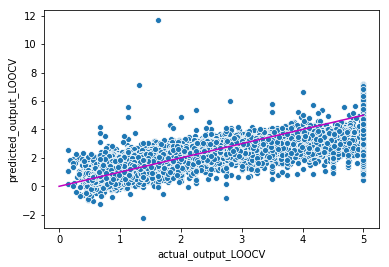

In [73]:
pltloo = sns.scatterplot(y, pred_loo)
pltloo.set(xlabel= 'actual_output_LOOCV', ylabel='predicted_output_LOOCV')
x_plot=np.linspace(0,5, 100)
y_plot = x_plot
pltloo.plot(x_plot, y_plot, color='m')

In [74]:
LOO_start = timer()
looscore= cross_val_score(lrk, x, y, cv=(len(x)), scoring='neg_mean_squared_error')
print(looscore.mean())
LOO_end= timer()

total_LOO = (LOO_end-LOO_start)

-0.5282462043712457


In [75]:
print(total_LOO)

387.78807240000015
